# ReCell Project
## Background:
**Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth ($)52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6\% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.**

**Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.**

## Objective:
**The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.**

### Exploratory data analysis (EDA) will also be carried out on the dataset to asnwer the following questions:

**1. What does the distribution of used phone prices look like?**

**2. What percentage of the used phone market is dominated by Android devices?**

**3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?**

**4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?**

**5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are 
available across different brands with a screen size larger than 6 inches?**

**6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?**

**7. Which attributes are highly correlated with the used phone price?**

## Data Description:¶
**The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.**

## Data Dictionary

**1. brand_name: Name of manufacturing brand**

**2. os: OS on which the phone runs**

**3. screen_size: Size of the screen in cm**

**4. 4g: Whether 4G is available or not**

**5. 5g: Whether 5G is available or not**

**6. main_camera_mp: Resolution of the rear camera in megapixels**

**7. selfie_camera_mp: Resolution of the front camera in megapixels**

**8. int_memory: Amount of internal memory (ROM) in GB**

**9. ram: Amount of RAM in GB**

**10. battery: Energy capacity of the phone battery in mAh**

**11. weight: Weight of the phone in grams**

**12. release_year: Year when the phone model was released**

**13. days_used: Number of days the used/refurbished phone has been used**

**14. new_price: Price of a new phone of the same model in euros**

**15. used_price: Price of the used/refurbished phone in euros**


## Importing necessary libraries and data

In [1]:
# Importing necessary libraries

# Library to help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")
# View top 5 rows of the data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [3]:
# let's view a random sample of the data for better observation
data.sample(n=5, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.68,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.15,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.47,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.88,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.81,8.92


<IPython.core.display.Javascript object>

In [4]:
# Check the number of rows and columns (i.e. shape) of the data
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 3571 rows and 15 columns.


<IPython.core.display.Javascript object>

In [5]:
# Check column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

### Observations

*  There are 3571 rows and 15 columns.

*  main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight columns have missing values.

*  4 columns (brand_name, os, 4g and 5g) are of object type and will be converted to categorical variables.

*  All other columns are of object type.

*  Dependent variable is used_price.


In [6]:
# Copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# Convert object data types to category
category_col = df.select_dtypes(exclude=np.number).columns.tolist()
df[category_col] = df[category_col].astype("category")

<IPython.core.display.Javascript object>

In [8]:
# checking to see that all columns are of the right data types
df.dtypes

brand_name          category
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
dtype: object

<IPython.core.display.Javascript object>

### Observations
* All variables in their right data types.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

### Statistical Summary

In [9]:
# Let's look at the statistical summary of the data

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

### Observations
* 4g and 5g columns have 2 unique values - "yes" and "no".

* The os column has 4 unique values.

* The brand_name column has 34 unique values, i.e., the data is collected from 34 phone brands.

* release_year ranges from 2013 to 2020.

* days_used ranges from 91 days to 1094 days.

* Average used_price is ~110 euros.

## Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

# Q1. What does the distribution of used phone prices look like?

##  Distribution of used phone prices 

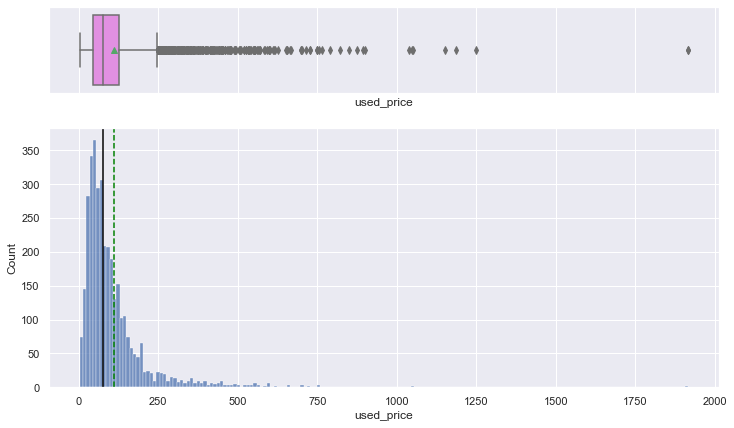

<IPython.core.display.Javascript object>

In [11]:
# Plot histogram and boxplot of used_price
histogram_boxplot(df, "used_price")

### Observation
* The distribution of used phone price is right skewed. 

* A right skewed distribution in this case means some used phones are very expensive compared to others.

* The distribution has a lot of Outliers

* Mean used phone price is around 110 euros.

* Median is around 75 euros.

## Distribution of new phones of the same model in euros

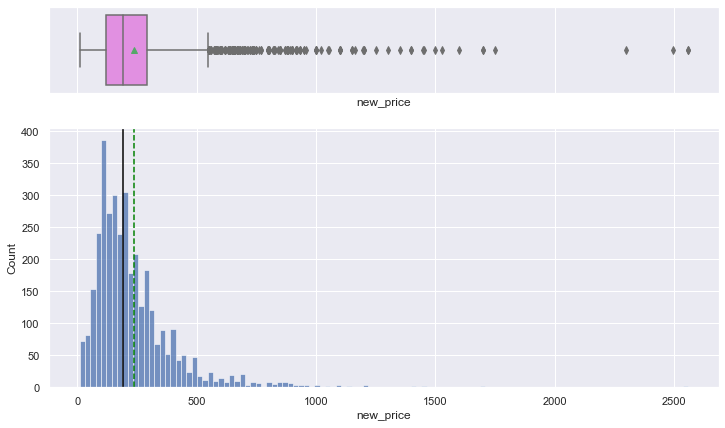

<IPython.core.display.Javascript object>

In [12]:
# Plot histogram and boxplot of new_price
histogram_boxplot(df, "new_price")

### Observations

* The distribution is also right skewed.

* Distribution is similar to that of used_price.

* The distribution also has a lot of Outliers similar to the used_price distribution.

## Distribution of the energy capacity of the battery

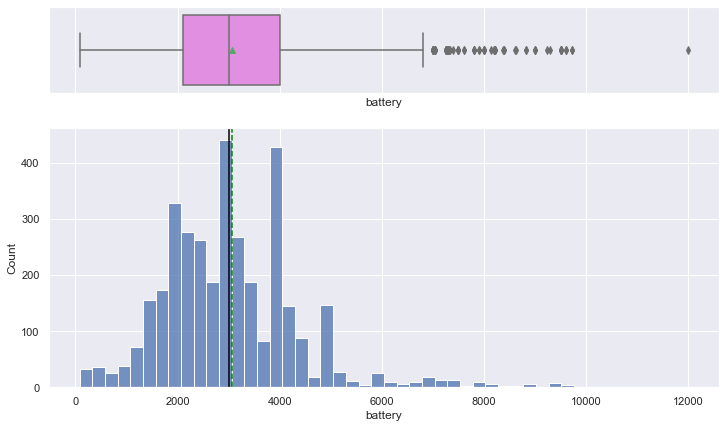

<IPython.core.display.Javascript object>

In [13]:
# Plot histogram and boxplot of battery
histogram_boxplot(df, "battery")

### Observations

* battery has an almost to normal distribution.

* It has some outliers in the upper range meaning that some batteries have way higher energy capacity than the rest.

* It has a median and mean around 3000mAh.

## Distribution of the weight of the phone.

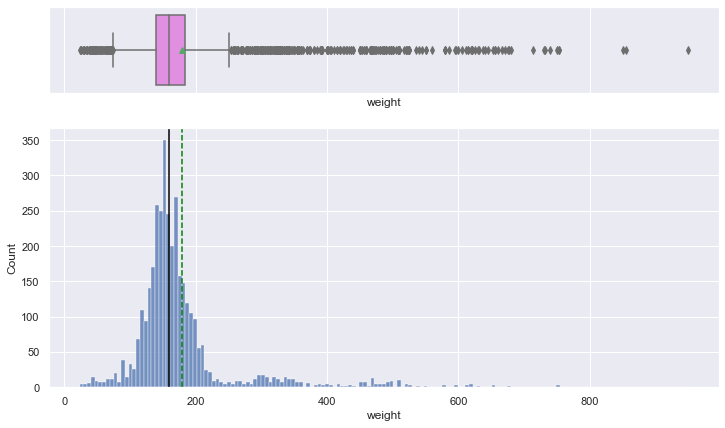

<IPython.core.display.Javascript object>

In [14]:
# Plot histogram and boxplot of weight
histogram_boxplot(df, "weight")


### Observations

* weight has a right skewed distribution.

* The distribution has a lot of outliers on both sides of the distribution.

* It has a median of 159 grams.

## Distribution of the screensize on the phones.

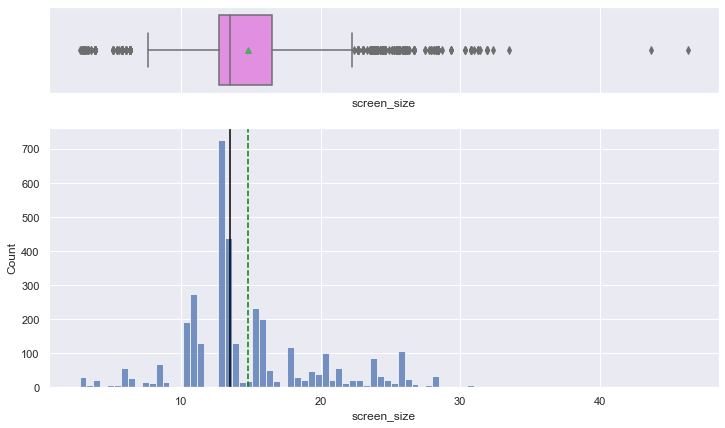

<IPython.core.display.Javascript object>

In [15]:
# Plot histogram and boxplot of screen_size
histogram_boxplot(df, "screen_size")

### Observations

* screen_size distribution is right skewed with outliers on both sides.

* It has a median of 13.49cm.

## Distribution of the Number of days the used/refurbished phone has been used

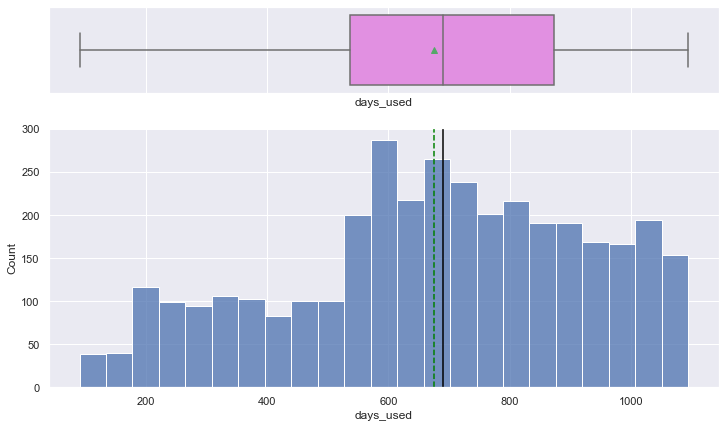

<IPython.core.display.Javascript object>

In [16]:
# Plot histogram and boxplot of days_used
histogram_boxplot(df, "days_used")

### Observations
* days_used has a left skewed / almost normal distribution.

* The distribution has a median of 690 and a mean around 675 days.

## Distribution of manufacturing brands

In [17]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


# show the plot

<IPython.core.display.Javascript object>

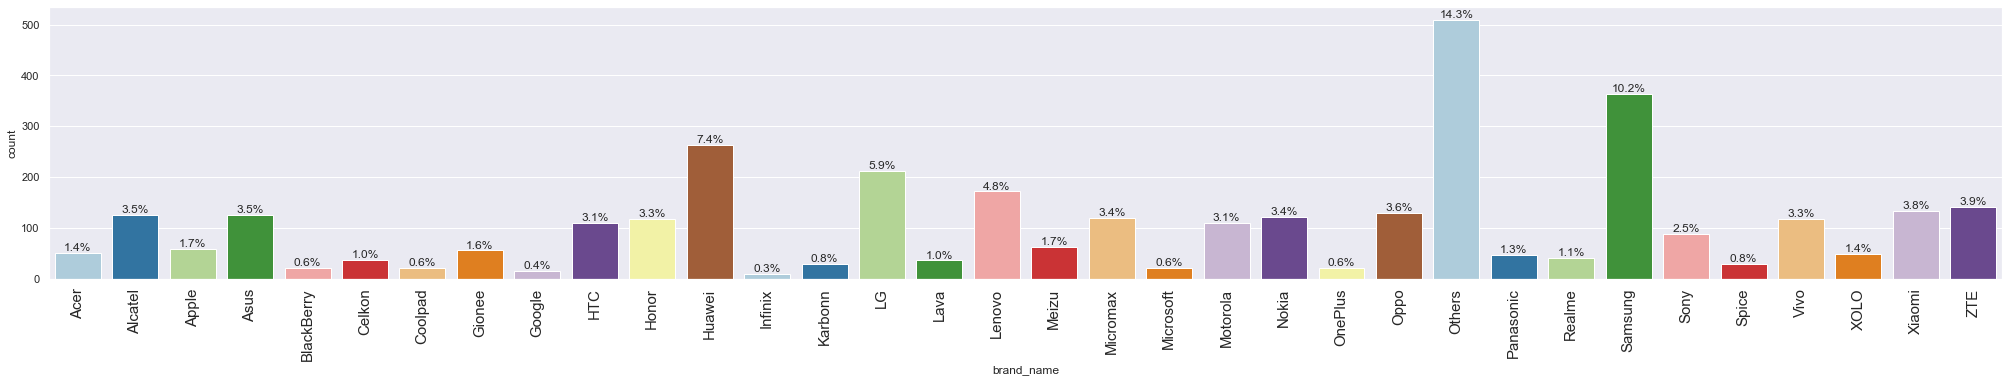

<IPython.core.display.Javascript object>

In [18]:
# Plot barplot of brand_name with percentage showing on each bar
labeled_barplot(df, "brand_name", perc=True)

### Observations

* Around 14.3% of the phones in the dataset are of unknown brand categorized as Others.

* Samsung (10.2%) is the highest represented known brand followed by Huawei (7.4%).

* Infinix is the least represented brand with 0.3% representation in the dataset.

# Q2. What percentage of the used phone market is dominated by Android devices?

## Distribution of the used phone market by Android devices?

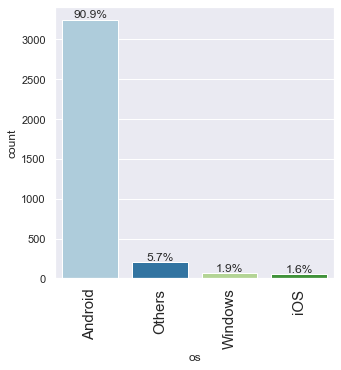

<IPython.core.display.Javascript object>

In [19]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(df, "os", perc=True)

### Observation

* 90.9% of the used phone market is dominated by Andriod devices.

* Phones running iOS are the least sold phones.

## Distribution of the 4g availability

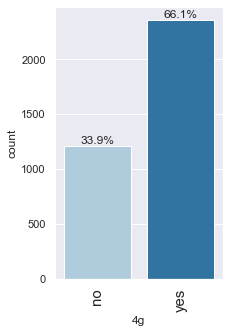

<IPython.core.display.Javascript object>

In [20]:
# Plot barplot of 4g with percentage showing on each bar
labeled_barplot(df, "4g", perc=True)

### Observations

* 66.1% of the used phones have 4g.

## Distribution of the 5g availability

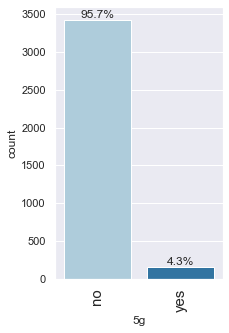

<IPython.core.display.Javascript object>

In [21]:
# Plot barplot of 5g with percentage showing on each bar
labeled_barplot(df, "5g", perc=True)

### Observations

* Only 4.3% of the phones have 5g.

* 95.7% of the used phones does not have 5g showing that majority of the used phones doesn't have 5g.

## Distribution of amount of RAM in GB

In [22]:
# Check number of unique RAM
df["ram"].nunique()

14

<IPython.core.display.Javascript object>

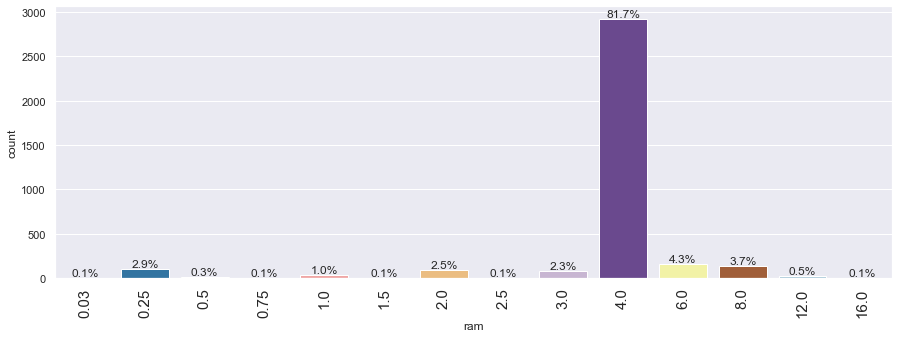

<IPython.core.display.Javascript object>

In [23]:
# Plot barplot of ram with percentage showing on each bar
labeled_barplot(df, "ram", perc=True)

### Observations

* There are 14 unique ram sizes.

* 81.7% of the used phones have 4GB ram size.

## Distribution of the phone release year

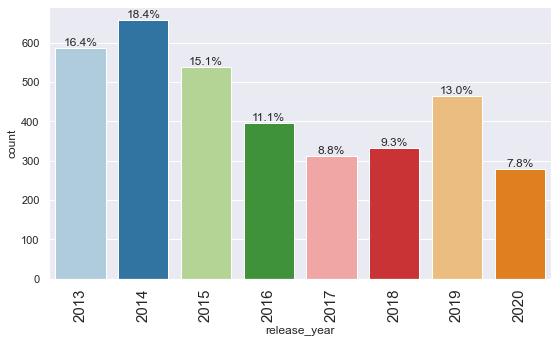

<IPython.core.display.Javascript object>

In [24]:
# Plot barplot of release_year with percentage showing on each bar
labeled_barplot(df, "release_year", perc=True)

### Observations

* Most of the phones (18.4%) were released in 2014.

* Understandably, 2020 has the least amount of phones in the used phone market.

## Distribution of the amount of internal memory(ROM)

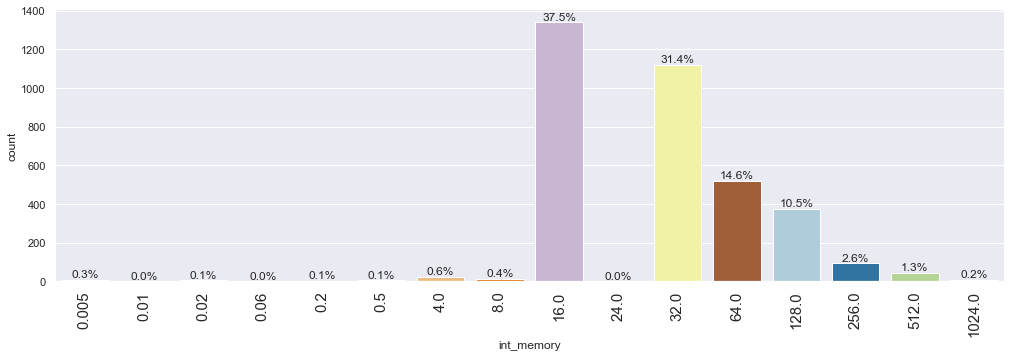

<IPython.core.display.Javascript object>

In [25]:
# Plot barplot of int_memory with percentage showing on each bar
labeled_barplot(df, "int_memory", perc=True)

### Observations

* There are 16 unique internal memory sizes.

* 37.5% of the phones have an internal memory of 16GB.

* Over 98% of the phones have an internal memory of atleast 16GB.

* 0.2% of the phones have an internal memory of 1024GB.

## Distribution of the main cameras and selfie cameras on the phones.

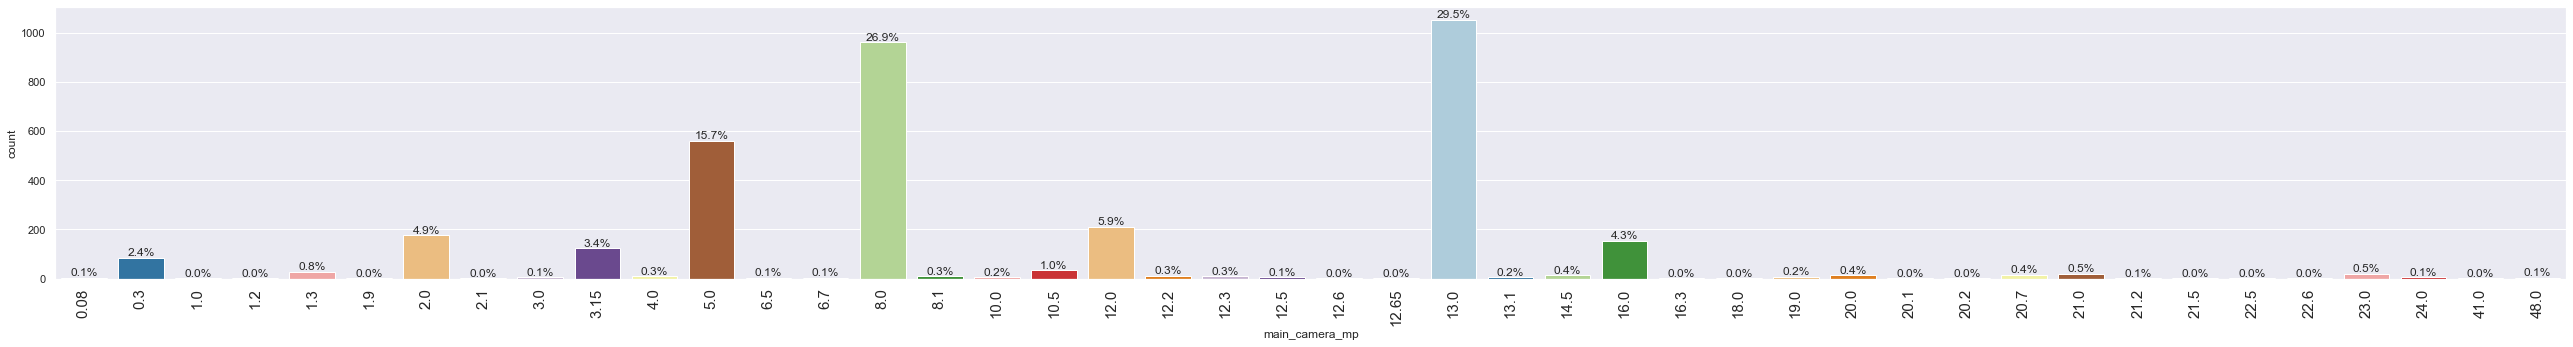

<IPython.core.display.Javascript object>

In [79]:
# Barplot of main camera of the phones
labeled_barplot(df, "main_camera_mp", perc=True)

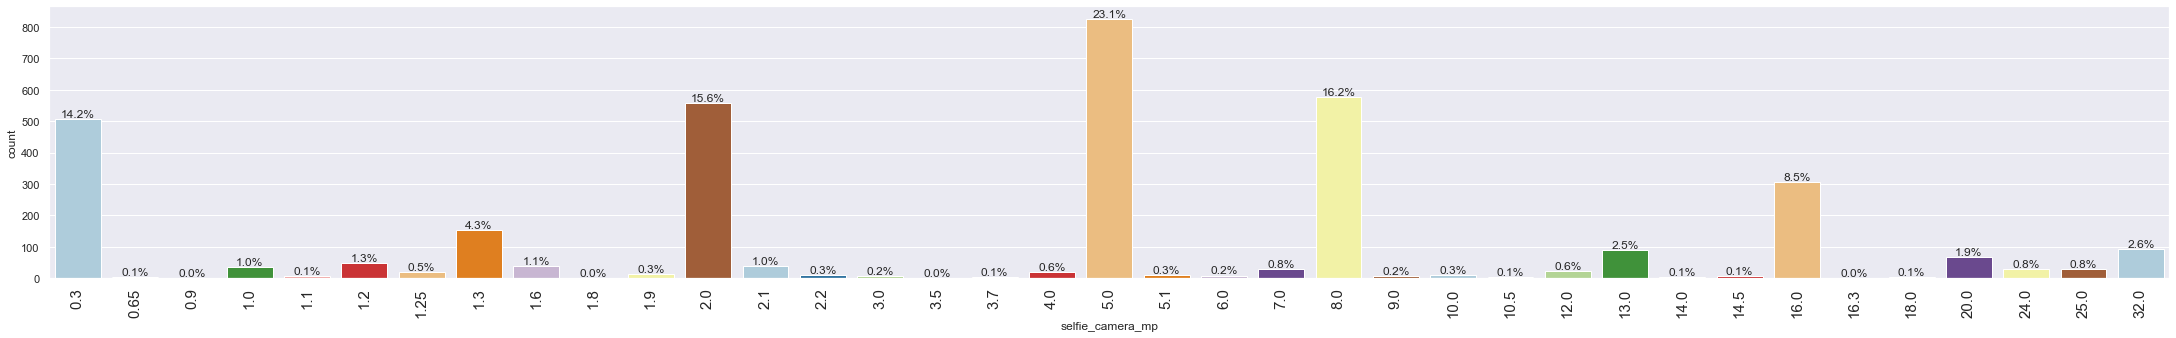

<IPython.core.display.Javascript object>

In [27]:
# Barplot of selfie camera of the phones
labeled_barplot(df, "selfie_camera_mp", perc=True)

### Main camera Observations

* There are only 44 unique main camera types.

* Most of the phones have a camera of either 13.0mp, 8.0mp or 5.0mp. This amount to over 60% of the dataset.


### Selfie camera Observations

* There are only 37 unique selfie camera type.

* 23.1% of the used phones have a selfie camera of 5.0mp.

* 2.6% of the phone dataset have highest possible selfie camera mp of 32.0mp.

* 14.2% of the phone dataset have smallest possible selfie camera mp of 0.3mp.


## Bivariate Analysis

# Q3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

## RAM vs Brand

In [28]:
# group dataset by brand name and find the mean of phone ram in each brand
df.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.426000
Apple         4.000000
Asus          4.047619
BlackBerry    3.829545
Celkon        1.466216
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.593220
Huawei        4.641326
Infinix       2.600000
Karbonn       3.375000
LG            3.893868
Lava          3.277778
Lenovo        3.886628
Meizu         4.451613
Micromax      3.750000
Microsoft     4.000000
Motorola      3.945455
Nokia         3.601351
OnePlus       6.363636
Oppo          4.961240
Others        3.751041
Panasonic     4.000000
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.567164
ZTE           4.023050
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

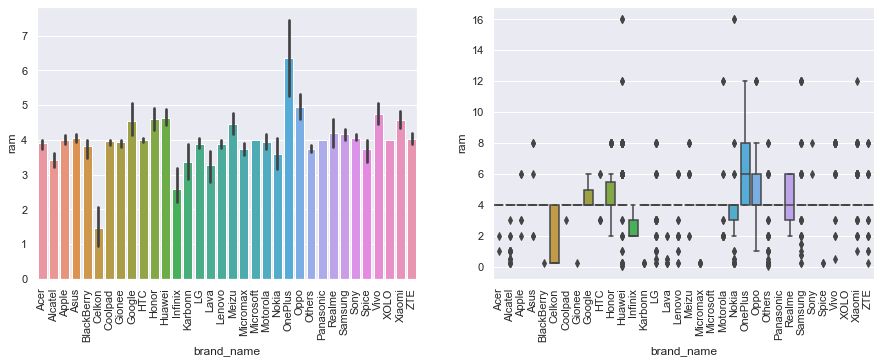

<IPython.core.display.Javascript object>

In [29]:
# visual analysis of how the ram varies per brand
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

### Observation

* All brands produce 4GB ram phones.

* Few brands produce phones with RAM size above 4gb. i.e. 6GB & 8GB RAM phones.

* OnePlus has the highest average ram at 6.364.

# Q4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

## Battery vs Weight of the phones

In [30]:
# Let's create dataframe of battery and weight for phones with large batteries of more than 4500 mAh

large_battery_df = df[df["battery"] > 4500]
large_battery_df.groupby("brand_name")["weight"].mean()

brand_name
Acer          360.000000
Alcatel       380.000000
Apple         397.747368
Asus          313.772727
BlackBerry           NaN
Celkon               NaN
Coolpad              NaN
Gionee        209.430000
Google        517.000000
HTC           425.000000
Honor         248.714286
Huawei        394.486486
Infinix       193.000000
Karbonn              NaN
LG            366.058333
Lava                 NaN
Lenovo        460.213793
Meizu                NaN
Micromax      118.000000
Microsoft            NaN
Motorola      200.757143
Nokia         318.000000
OnePlus              NaN
Oppo          195.000000
Others        390.546341
Panasonic     182.000000
Realme        196.833333
Samsung       384.723077
Sony          439.500000
Spice         158.000000
Vivo          195.630769
XOLO                 NaN
Xiaomi        231.500000
ZTE           195.400000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

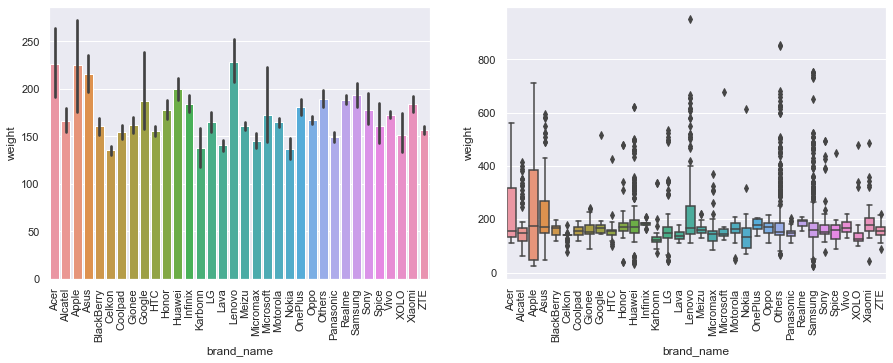

<IPython.core.display.Javascript object>

In [31]:
# Visualize the relationship battery and weight of phones
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.show()


### Observation

* Not all brands produce phones with batteries larger than 4500maH.

* Weight of phones with large batteries (more than 4500 mAh) varies between 200 to 800 grams with some few outliers.

# Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

## Screen vs Brand

In [32]:
# We need to convert
df["screen_size"] = df["screen_size"].apply(lambda sc_in: round(sc_in * 0.394, 2))
# To determine how many phones are available across different brands with a screen size larger than 6 inches
df_large_screen = df[df["screen_size"] > 6]
df_large_screen["brand_name"].value_counts(ascending=False)

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Asus           44
Motorola       44
Realme         40
Nokia          28
Alcatel        28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
XOLO            4
Google          4
Coolpad         3
Celkon          2
BlackBerry      2
Lava            2
Spice           2
Karbonn         2
Panasonic       2
Microsoft       1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df_large_screen.shape

(1235, 15)

<IPython.core.display.Javascript object>

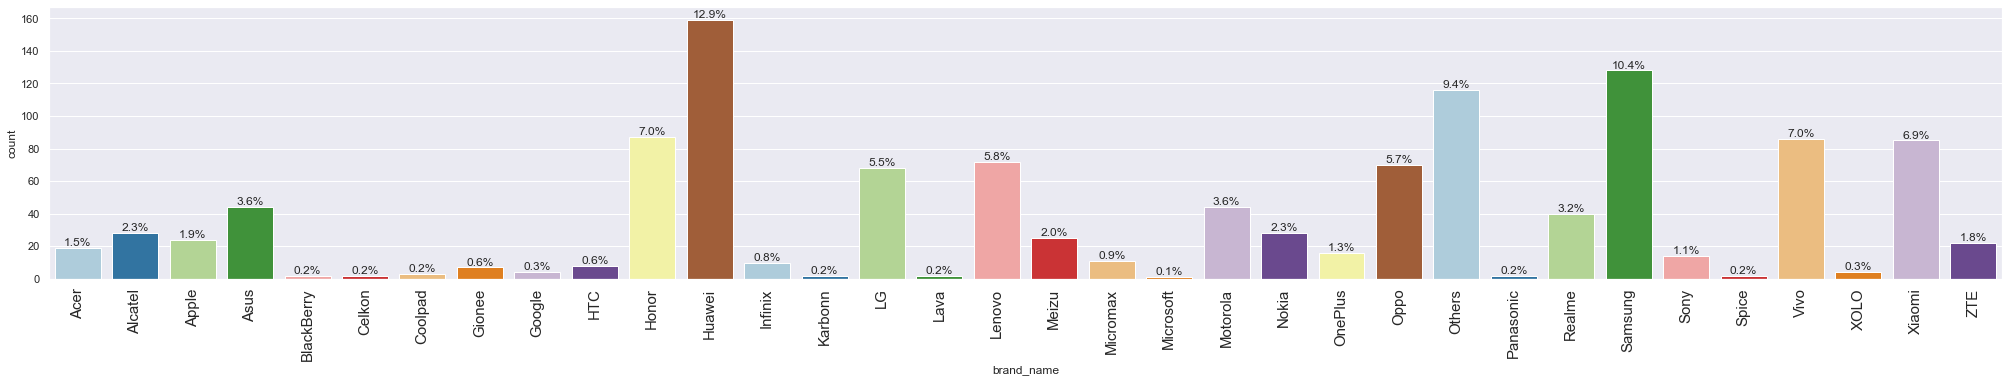

<IPython.core.display.Javascript object>

In [34]:
# visualize the different brands producing phones with a screen size larger than 6 inches
labeled_barplot(df_large_screen, "brand_name", perc=True)

### Observations

* 1235 phones with screen size above 6 inches are produced by the above brands.

* All brands produce phones with screen size above 6 inches.

# Q6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [35]:
# Dataframe of budget phones and having selfie camera mp greater then 8mp
budget_over_8mp = df[
    (df["new_price"] <= df["new_price"].median()) & (df["selfie_camera_mp"] > 8)
]
budget_over_8mp.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
13,Honor,Others,3.44,no,no,13.0,16.0,4.0,4.0,455.0,41.0,2019,432,179.62,89.77
18,Honor,Android,9.70,yes,no,13.0,16.0,64.0,4.0,4000.0,206.0,2019,421,180.04,90.02
23,HTC,Android,6.13,yes,no,13.0,16.0,32.0,3.0,3850.0,170.0,2019,187,180.50,136.38
63,Infinix,Android,6.38,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,99.70,64.51
64,Infinix,Android,6.13,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,130.49,65.29


<IPython.core.display.Javascript object>

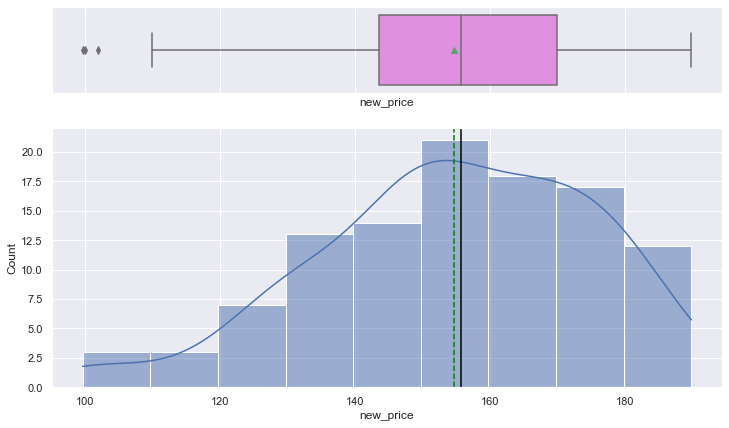

<IPython.core.display.Javascript object>

In [36]:
# Using custom histogram_boxplot function to visualize the distribution
histogram_boxplot(budget_over_8mp, "new_price", kde=True)

### Observations

* Budget phones offering greater than 8MP. Selfie cameras have left skewed distribution with few outliers on the left side.

# Q7. Which attributes are highly correlated with the used phone price?

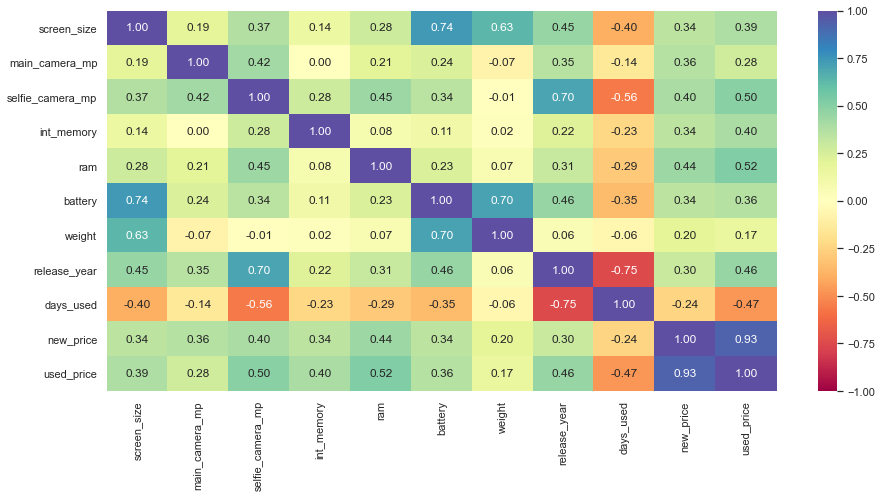

<IPython.core.display.Javascript object>

In [37]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

## Observation

* used_price is highly correlated with new_price which means the higher the new price the higher the used price tends to increase.

* used_price also moderately correlated with ram and selfie_camera_mp meaning the higher the phone ram or selfie camera pixels the higher the price of the used phone.

* used_price is moderately correlate negatively with days_used which can mean that the longer the duration the phone was used the lower the price of such used phone.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Missing Value Treatment

In [38]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [39]:
# Lets fix the missing values.
# fill missing columns with the column median
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df[col_to_fill] = df[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

<IPython.core.display.Javascript object>

In [40]:
# checking the number of missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

## Observation

* main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values.
* All the missing values were all replaced with median values.

## Feature Engineering
## Log transformation

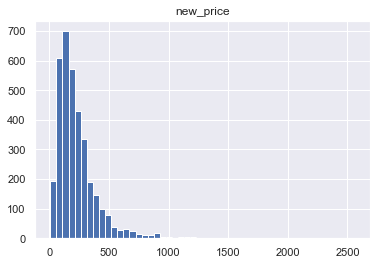

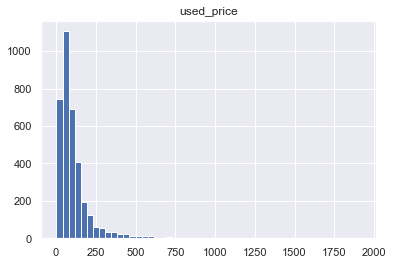

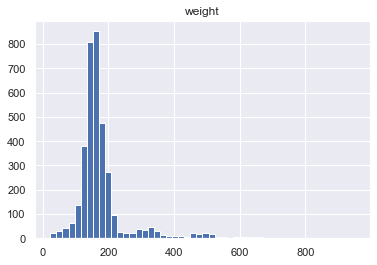

<IPython.core.display.Javascript object>

In [41]:
# used_price, new_price, weight are very skewed and will likely behave better on the log scale.
# Plot of "new_price", "used_price" and "weight" before log transformation
cols_to_log = ["new_price", "used_price", "weight"]

for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()

In [42]:
# Log transformation
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname])

df.drop(cols_to_log, axis=1, inplace=True)  # drop previous price columns

<IPython.core.display.Javascript object>

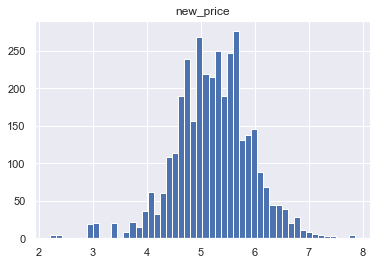

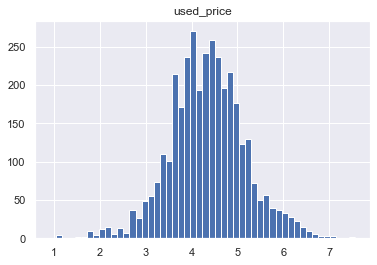

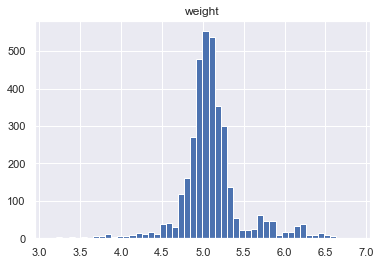

<IPython.core.display.Javascript object>

In [43]:
# Plot of "new_price", "used_price" and "weight" after log transformation
for colname in cols_to_log:
    plt.hist(df[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()

### Observation

* With log transformation, we have been able to achieve a a normal distribution of the columns.

## Encoding categorical columns

* Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not.

In [44]:
# Create dummy variables for the categorical data
df1 = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)
# view head to examine new dataframe containing the encoded categorical variables
df1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,new_price_log,used_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,9.44,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,4.465448,4.983607,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,11.07,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,5.084443,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.57,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,5.593037,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,10.26,13.0,8.0,64.0,6.0,7250.0,2020,345,5.630961,5.194234,6.173786,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,6.19,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,4.642466,5.220356,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## Observation

* We have successfully encoded the categorical variables and now ready for machine learning.

## Outlier detection & treatment
### Let's look at outliers in every numerical column

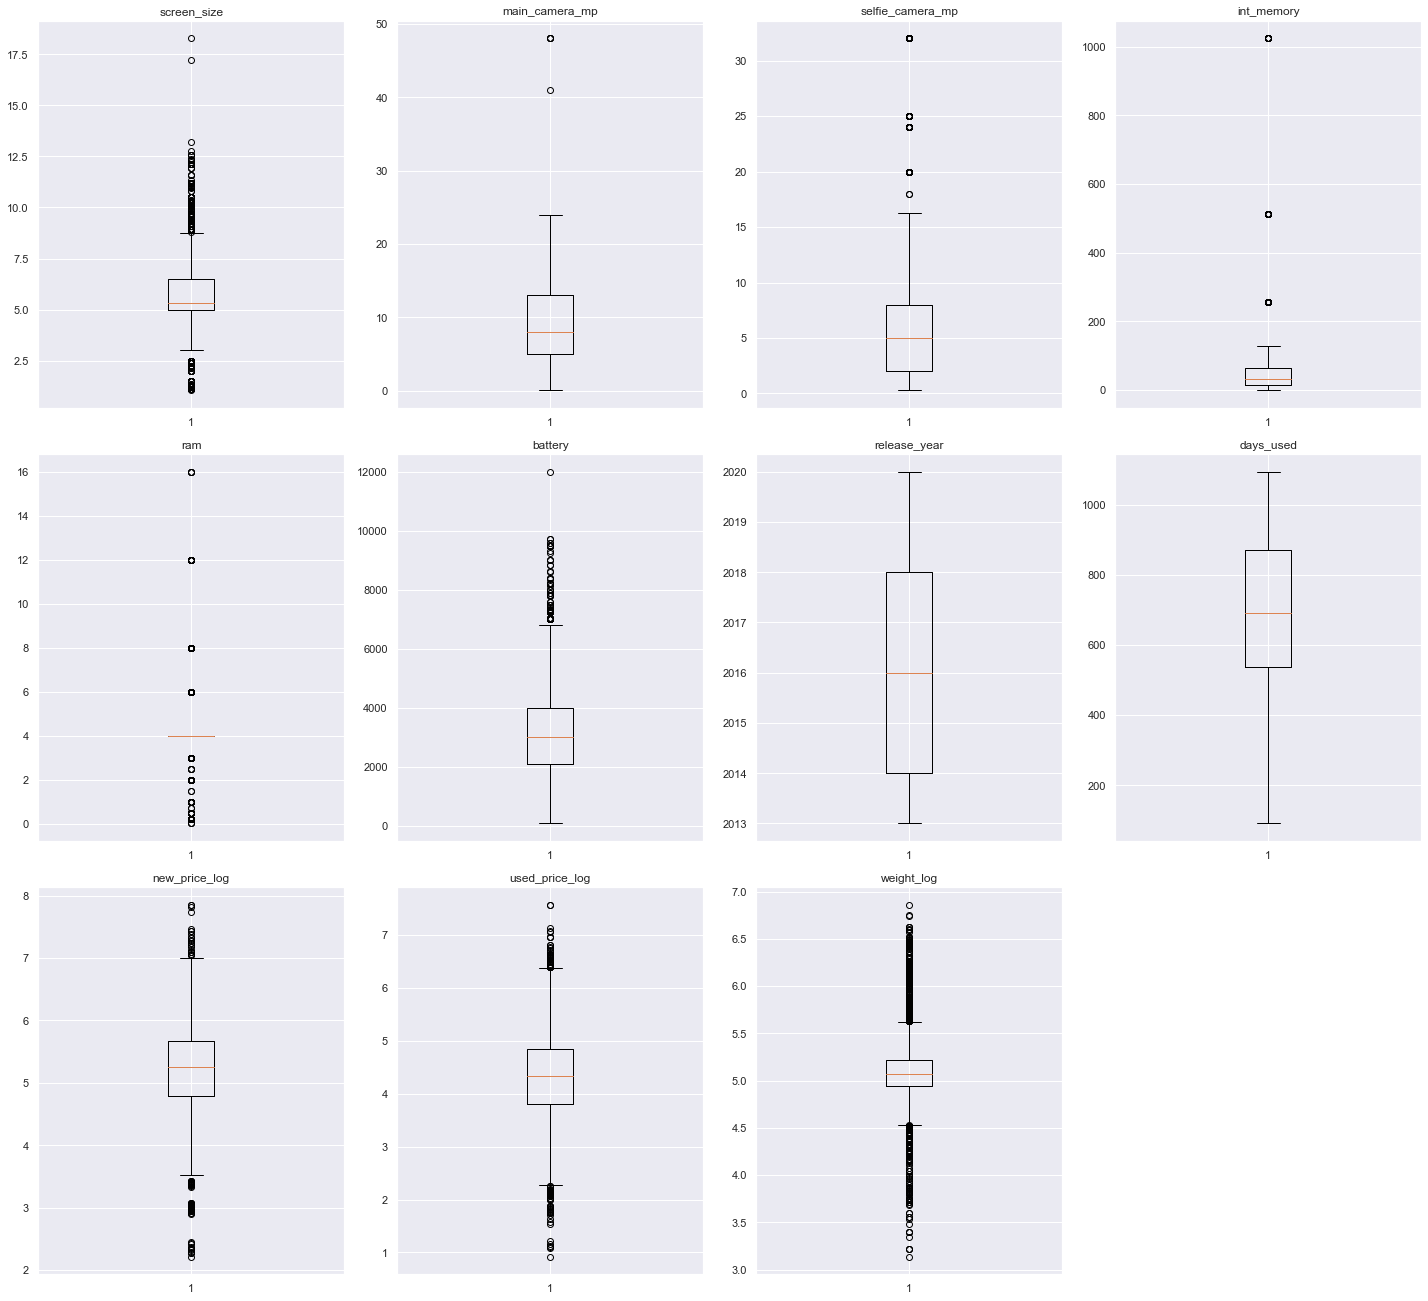

<IPython.core.display.Javascript object>

In [45]:
# let's plot the boxplots of all numerical columns to check for outliers
plt.figure(figsize=(20, 30))

for i, var in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

## Observations 

* There are outliers in all the numerical columns except for release_year and days_used.

* We will not treat the outliers, treating the outliers can lead to loss of vital information.

## EDA after Data Preprocessing

* It is a good idea to explore the data once again after manipulating it.

## Univariate Analysis

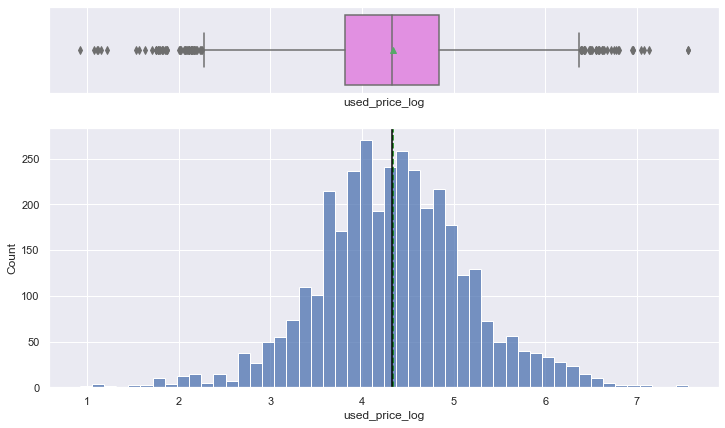

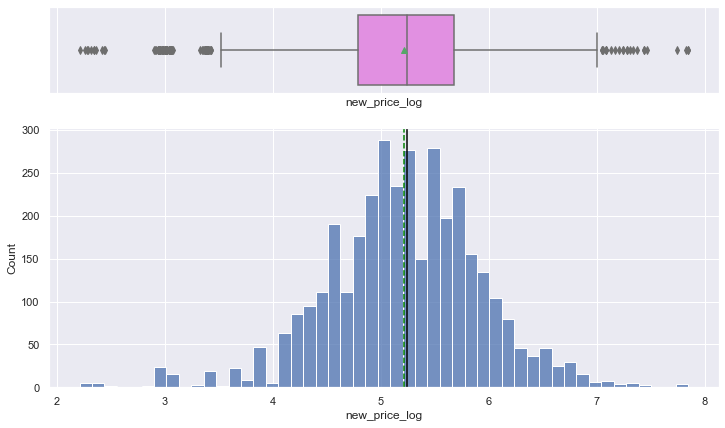

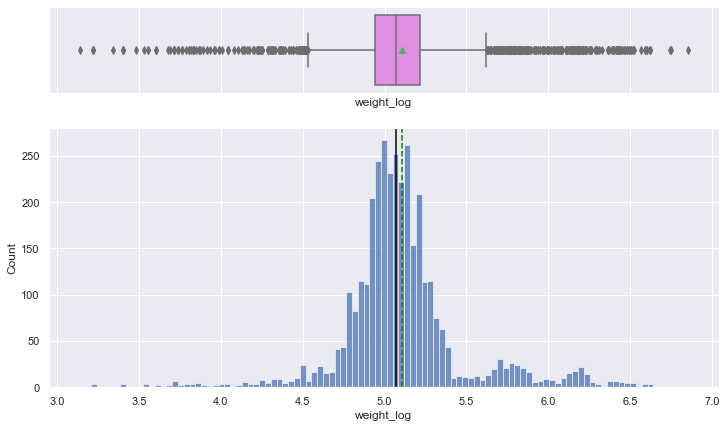

<IPython.core.display.Javascript object>

In [46]:
for col in ["used_price_log", "new_price_log", "weight_log"]:
    histogram_boxplot(df, col)

## Observations

* weight, used_price & new_price distribution now has an almost normal distribution after the log transformation.

## Bivariate Analysis

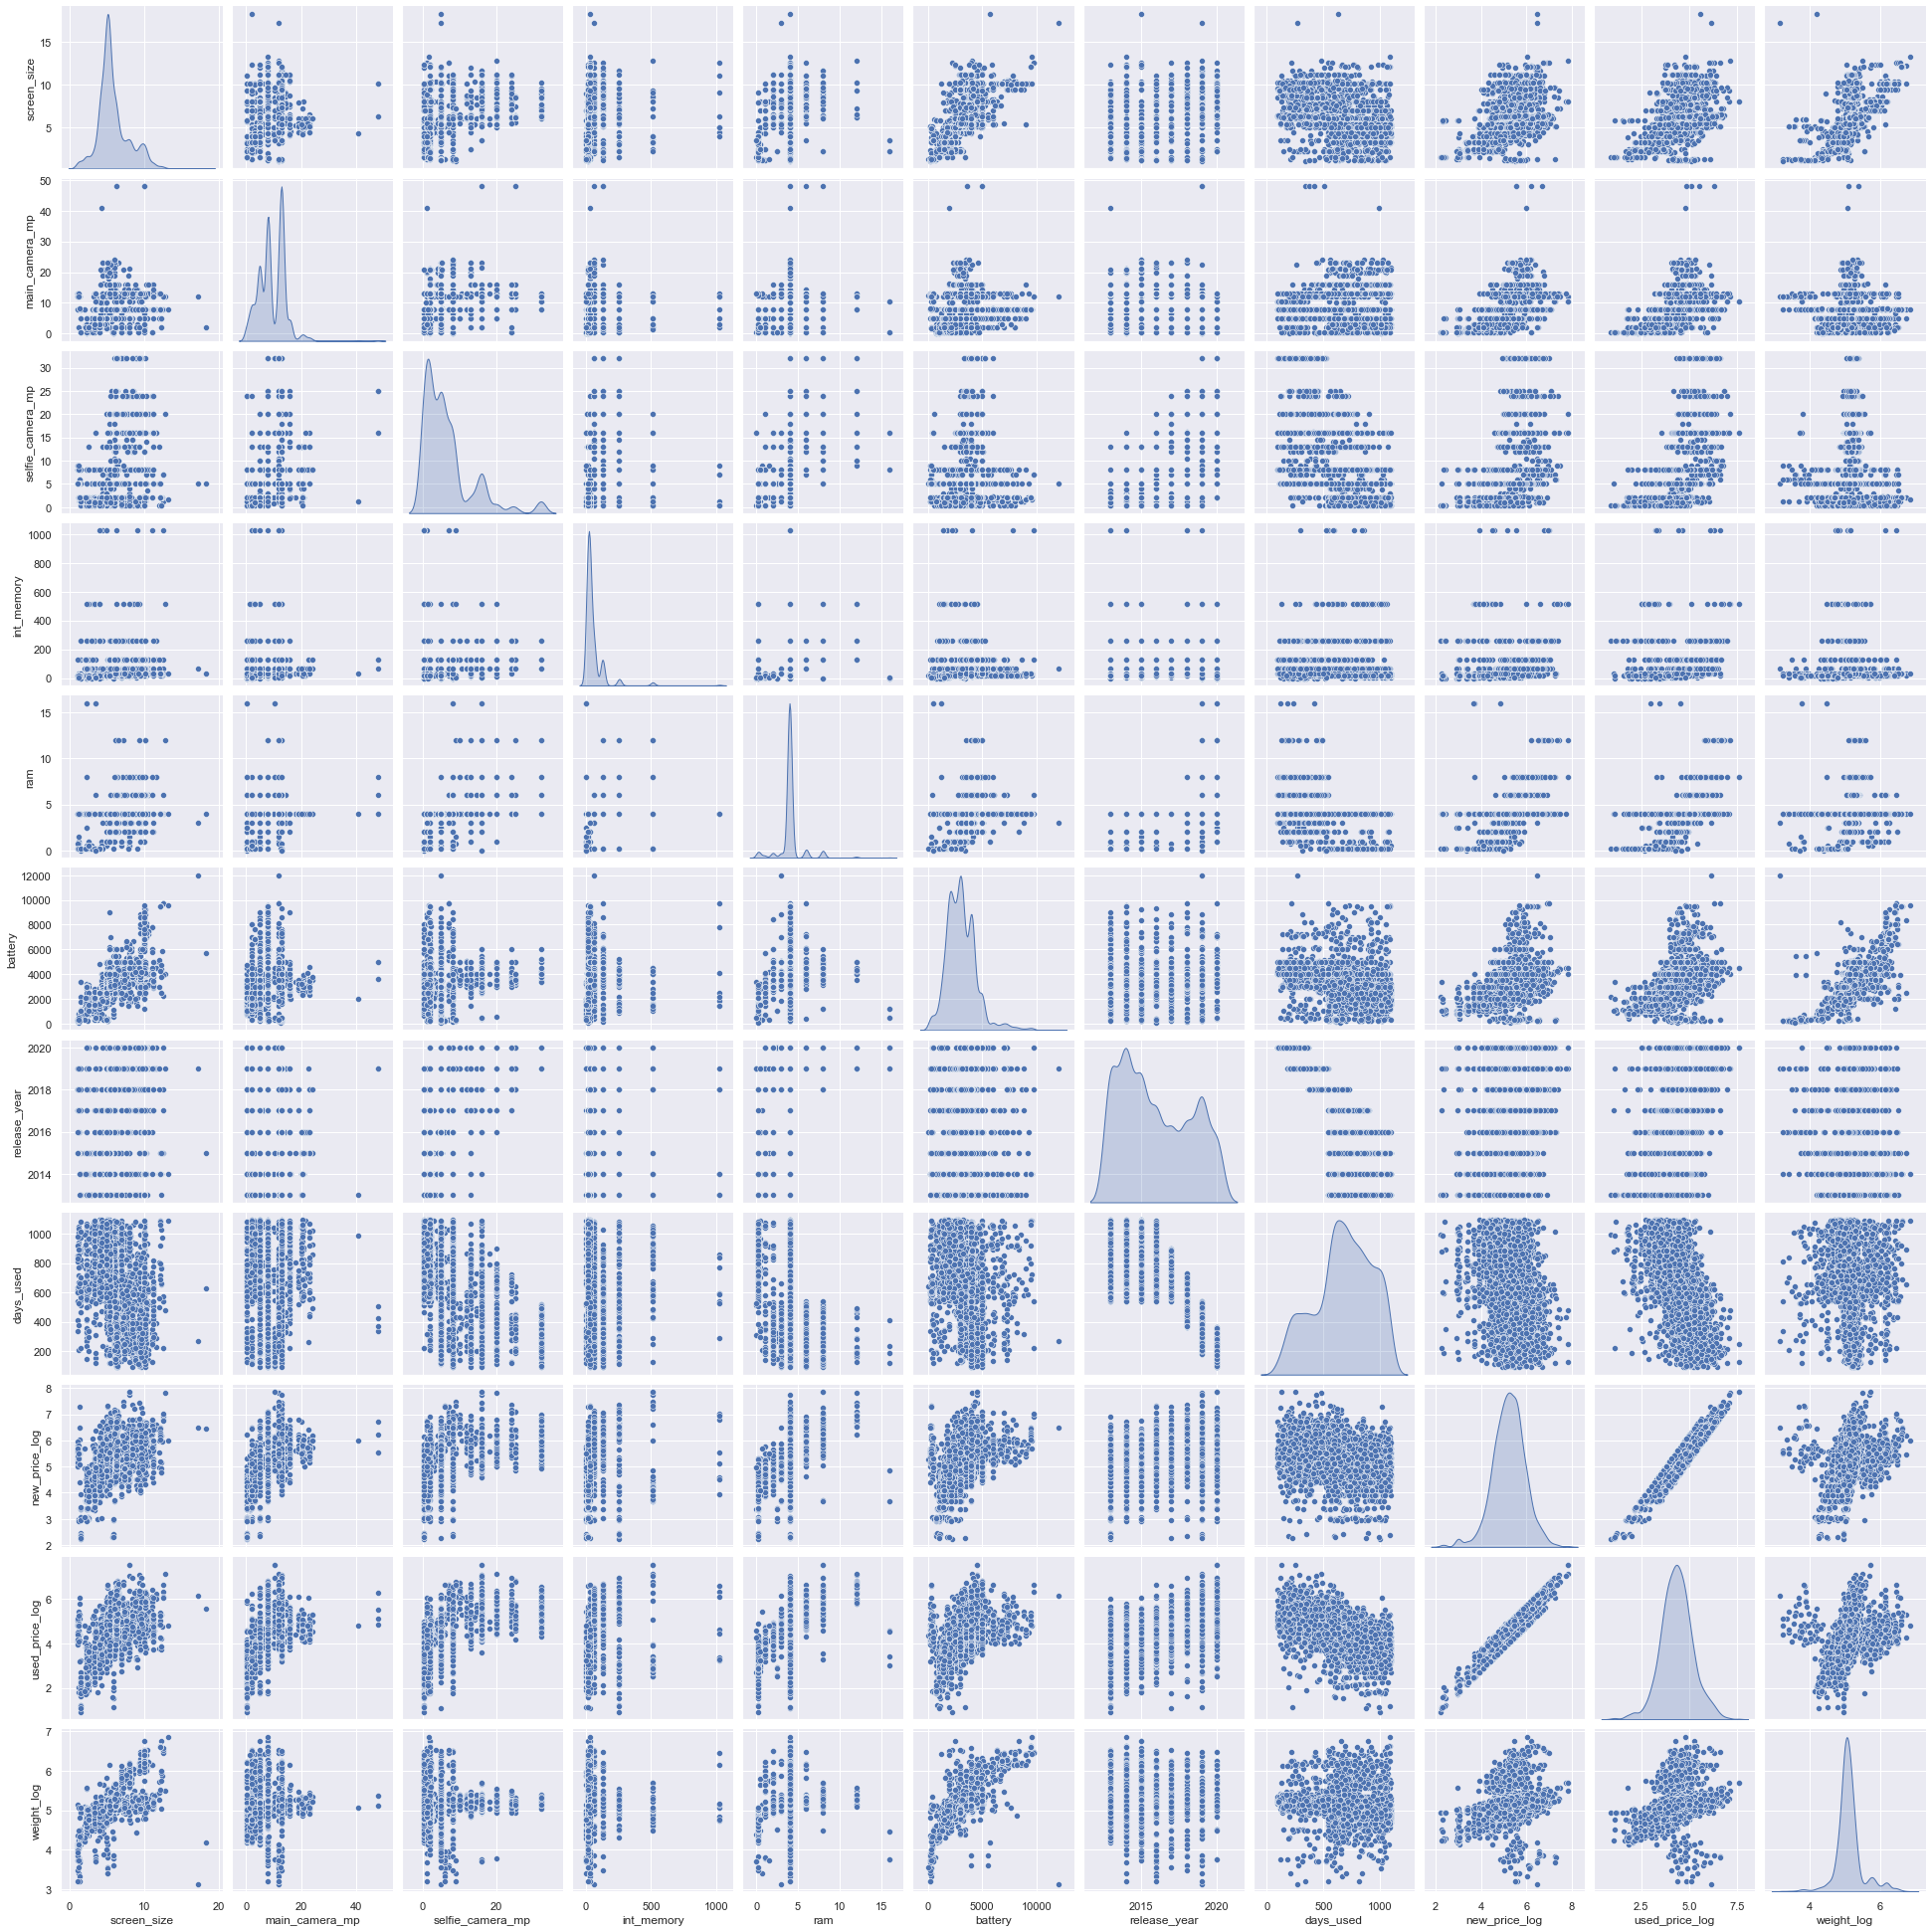

<IPython.core.display.Javascript object>

In [47]:
sns.pairplot(df, diag_kind="kde")

## Observations

* Observation between 'used_price' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.

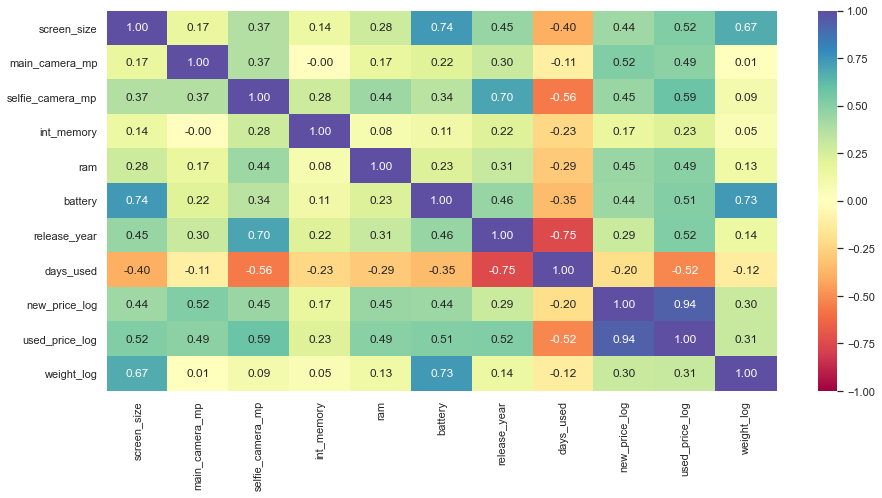

<IPython.core.display.Javascript object>

In [48]:
# Looking at the correlations
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
# plt.show()

plt.savefig("heat_map", dpi=300, bbox_inches="tight")

## Observations

* used_price is highly correlated with new_price.

* used_price also moderately correlated with selfie_camera_mp, screen_size, release_year and battery.

* used_price is moderately correlate negatively with days_used.

## Building a Linear Regression model

In [49]:
# defining X and y variables
X = df1.drop(["used_price_log"], axis=1)
y = df1["used_price_log"]
# view independent variables
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,new_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,9.44,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,4.983607,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,11.07,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.57,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,10.26,13.0,8.0,64.0,6.0,7250.0,2020,345,5.630961,6.173786,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,6.19,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,5.220356,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [50]:
# view dependent variables
y.head()

0    4.465448
1    5.084443
2    5.593037
3    5.194234
4    4.642466
Name: used_price_log, dtype: float64

<IPython.core.display.Javascript object>

## Objective

* We want to predict the used price. Thus used_price_log is the dependent variable.

* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

* We will build a Linear Regression model using the train data and then check it's performance.

### Splitting data to test and train data

In [51]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
# check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

### Build linear regression model

In [52]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Let's check the coefficients and intercept of the model.

In [53]:
# datafram to show the model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.004343
main_camera_mp,-0.000234
selfie_camera_mp,0.000928
int_memory,0.000024
ram,0.000367
battery,-0.000002
release_year,0.002947
days_used,-0.001109
new_price_log,0.995649
weight_log,-0.005310


<IPython.core.display.Javascript object>

## Model performance evaluation

* We will use metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define a function to calculate MAPE and adjusted $R^2$.

* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. 

In [54]:
# function to compute adjusted R-squared


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [55]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082465,0.068553,0.990229,0.990038,1.696099


<IPython.core.display.Javascript object>

In [56]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.083912,0.071311,0.989704,0.989221,1.72712


<IPython.core.display.Javascript object>

### Observations

* The training $R^2$ is 99%, indicating that the model explains 99% of the variation in the train data. So, the model is not underfitting.

* MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

* MAE indicates that our current model is able to predict used price within a mean error of 0.071 euros on the test data.

* MAPE on the test set suggests we can predict within 1.72% of the used price.

## Linear Regression using statsmodels

In [57]:
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5173.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:23:40   Log-Likelihood:                 2690.0
No. Observations:                2499   AIC:                            -5282.
Df Residuals:                    2450   BIC:                            -4997.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.06

<IPython.core.display.Javascript object>

### Observations

* Negative values of the coefficient show that used_price decreases with the increase of corresponding attribute value.

* Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

* But these variables might contain multicollinearity, which will affect the p-values.

* So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## We will be checking the following Linear Regression assumptions:
* No Multicollinearity

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

## TEST FOR MULTICOLLINEARITY
* Variance Inflation Factor (VIF):

 * General Rule of thumb:
 
   * If VIF is between 1 and 5, then there is low multicollinearity.
  
   * If VIF is between 5 and 10, we say there is moderate multicollinearity.
  
   * If VIF is exceeding 10, it shows signs of high multicollinearity.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif


checking_vif(X_train1)

,feature,VIF
0,const,3566355.51
1,screen_size,3.23
2,main_camera_mp,2.13
3,selfie_camera_mp,2.84
4,int_memory,1.27
5,ram,1.79
6,battery,3.58
7,release_year,4.61
8,days_used,2.63
9,new_price_log,3.01


<IPython.core.display.Javascript object>

## Observation

* brand_name_Apple and os_iOS have a VIF score of much greater than 5. Clearly these variables are correlated with each other.

* This does seem to make intuitive sense because the Apple phones would much likely operate on an iOS os.

* brand_name_Huawei, brand_name_LG, brand_name_Others and brand_name_Samsung have VIF slightly greater than 5.


## Removing Multicollinearity

* To remove multicollinearity

  * Drop every column one by one that has a VIF score greater than 5.
  
  * Look at the adjusted R-squared and RMSE of all these models.
  
  * Drop the variable that makes the least change in adjusted R-squared.
  
  * Check the VIF scores again.
  
  * Continue till you get all VIF scores under 5.

In [59]:
# Let's define a function that will help us do this.
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [60]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.990041,0.083273
1,brand_name_LG,0.990032,0.083308
2,brand_name_Others,0.990032,0.083310
3,os_iOS,0.990032,0.083311
4,brand_name_Samsung,0.990029,0.083324
5,brand_name_Apple,0.990028,0.083326


<IPython.core.display.Javascript object>

In [61]:
# Drop brand_name_Huawei
col_to_drop = "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]
# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3563816.58
1,screen_size,3.23
2,main_camera_mp,2.13
3,selfie_camera_mp,2.84
4,int_memory,1.27
5,ram,1.79
6,battery,3.58
7,release_year,4.60
8,days_used,2.63
9,new_price_log,3.01


<IPython.core.display.Javascript object>

## Observation

* Dropping brand_name_Huawei has brought the VIF of brand_name_Others, brand_name_Samsung, brand_name_Huawei, and brand_name_LG below 5.

* brand_name_Apple and os_iOS still have a VIF score much greater than 5.

In [62]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.990035,0.083298
1,brand_name_Apple,0.990032,0.083310


<IPython.core.display.Javascript object>

In [63]:
# We will drop "brand_name_Apple
col_to_drop = "brand_name_Apple"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3557548.06
1,screen_size,3.23
2,main_camera_mp,2.13
3,selfie_camera_mp,2.82
4,int_memory,1.27
5,ram,1.78
6,battery,3.58
7,release_year,4.60
8,days_used,2.63
9,new_price_log,2.99


<IPython.core.display.Javascript object>

## Observation

* The above predictors have little to no multicollinearity and the assumption is satisfied.

In [64]:
# Let's check the model performance.
# Using ols mdel to view the data

olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5395.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:23:42   Log-Likelihood:                 2688.3
No. Observations:                2499   AIC:                            -5283.
Df Residuals:                    2452   BIC:                            -5009.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.34

<IPython.core.display.Javascript object>

## Observations

* We can see that adj. R-squared has not dropped from 0.99, which shows that the dropped columns did not have much effect on the model.

* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

* Some variables have p-value > 0.05. So, they are not significant and we'll drop them.

* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

### Instead, we will do the following:

* Build a model, check the p-values of the variables, and drop the column with the highest p-value.

* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.

* Repeat the above two steps till there are no columns with p-value > 0.05.

* The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [65]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'days_used', 'new_price_log', 'brand_name_Gionee', 'brand_name_Lenovo', 'brand_name_Panasonic', '5g_yes']


<IPython.core.display.Javascript object>

In [66]:
# Use only the variables with p-values less than 0.05 to train model

X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.105e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:23:42   Log-Likelihood:                 2670.5
No. Observations:                2499   AIC:                            -5323.
Df Residuals:                    2490   BIC:                            -5271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1220 

<IPython.core.display.Javascript object>

* Now no feature has p-value greater than 0.05, so we'll consider the features in X_train4 as the final ones and olsmod2 as final model.


## Observations

* Adjusted R-squared is still 0.990, i.e., our model is able to explain ~99% of the variance. This shows that the model is very good.

*  The adjusted R-squared in olsmod0 (where we considered all the variables) was 0.99. This shows that the variables we dropped were not affecting the model much.


### Now we'll check the rest of the assumptions on olsmod2.

* Linearity of variables.

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

## TEST FOR LINEARITY AND INDEPENDENCE

In [67]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1248,4.593806,4.611716,-0.017910
2206,4.887488,4.868414,0.019074
1623,3.229618,3.293303,-0.063685
2245,4.646888,4.564350,0.082538
1043,3.669187,3.778901,-0.109714


<IPython.core.display.Javascript object>

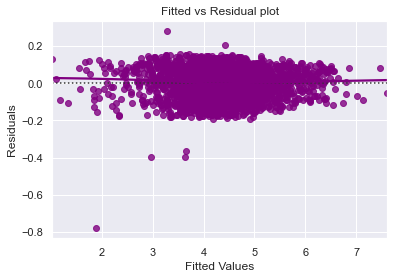

<IPython.core.display.Javascript object>

In [68]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Observation

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

## TEST FOR NORMALITY

### How to check normality?

* The shape of the histogram of residuals can give an initial idea about the normality.

* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.

### Other tests to check for normality includes the Shapiro-Wilk test.
   * Null hypothesis: Residuals are normally distributed.
   
   * Alternate hypothesis: Residuals are not normally distributed.
   
   
### How to fix if this assumption is not followed?

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

## Let's check the shape of the residual.

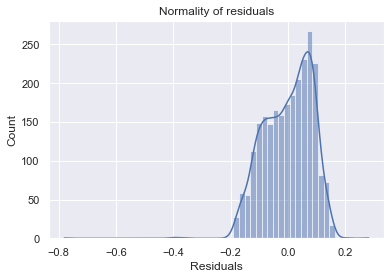

<IPython.core.display.Javascript object>

In [69]:
# histogram plot of the residual
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

## Observation

* The histogram of residuals does have a shape close to bell shape.

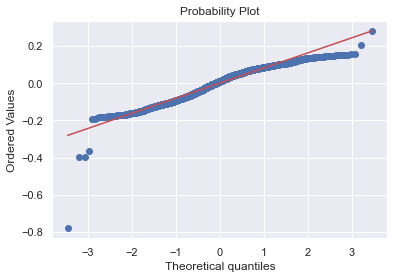

<IPython.core.display.Javascript object>

In [70]:
# Let's check the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

## Observation

* The residuals more or less follow a straight line except for the tails.

## Let's check the results of the Shapiro-Wilk test.

In [71]:
# Let's use shapiro test for normality
# Shipiro test for normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9564372897148132, pvalue=1.0353389543133614e-26)

<IPython.core.display.Javascript object>

## Observation

* Since p-value > 0.05, the residuals are not normal as per the Shapiro-Wilk test.

* Strictly speaking, the residuals are not normal.

* However, as an approximation, we can accept this distribution as close to being normal.

* So, the assumption is satisfied.


## TEST FOR HOMOSCEDASTICITY

* Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.


## How to check for homoscedasticity?

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.

* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

   * Null hypothesis: Residuals are homoscedastic.
   
   * Alternate hypothesis: Residuals have heteroscedasticity.
   
## How to fix if this assumption is not followed?

### Heteroscedasticity can be fixed by adding other important features or making transformations.

In [72]:
# goldfeldquandt test for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.9182274845656128), ('p-value', 0.9334250562071055)]

<IPython.core.display.Javascript object>

## Observation

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary

In [73]:
# Automate the linear regresion equation of fit
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train4.columns[i], ")")

Used Phone Price = -0.122 + ( 0.0033 )*( screen_size ) +  ( 0.0009 )*( selfie_camera_mp ) +  ( -0.0011 )*( days_used ) +  ( 0.9955 )*( new_price_log ) +  ( -0.0367 )*( brand_name_Gionee ) +  ( -0.023 )*( brand_name_Lenovo ) +  ( -0.0319 )*( brand_name_Panasonic ) +  ( 0.0252 )*( 5g_yes )


<IPython.core.display.Javascript object>

## Observation
* Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.

In [74]:
# predictions on the test set
pred = olsmod2.predict(X_test4)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,5.270175,5.305901
1398,5.137209,5.088202
2253,5.104490,5.167652
579,3.665867,3.805829
3123,3.808439,3.783057
1959,3.932806,4.037082
3111,3.690628,3.587174
1456,4.002777,3.944575
3332,4.554508,4.542327
855,3.784871,3.732835


<IPython.core.display.Javascript object>

## Observation

* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

### We can also visualize comparison result as a bar graph.

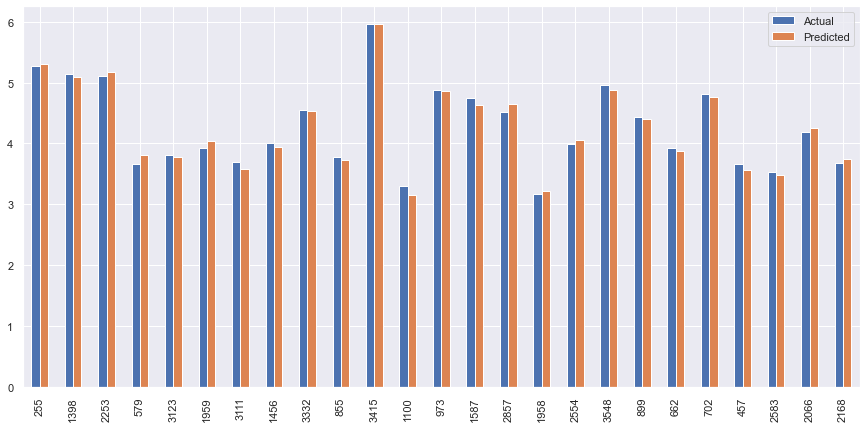

<IPython.core.display.Javascript object>

In [75]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [76]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.083113,0.069395,0.990075,0.990039,1.716225


<IPython.core.display.Javascript object>

In [77]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082782,0.070442,0.98998,0.989895,1.703812


<IPython.core.display.Javascript object>

## Observations

* The model is able to explain ~99% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within ~1.7% of the used_price.

* Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.


## Let's recreate the final statsmodels model and print it's summary to gain insights.

In [78]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.105e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:23:46   Log-Likelihood:                 2670.5
No. Observations:                2499   AIC:                            -5323.
Df Residuals:                    2490   BIC:                            -5271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1220 

<IPython.core.display.Javascript object>

## Insights & Conclusion

* release_year, days_used, new_price, brand_name_Gionee, 4g and 5g are the factors that affects the price for used phones.

* Phone price seem to decrease in price immediatelty after purchase.

* An increase in the price of new phone will lead to an increase in the price of used phone.

* days_used, brand_name_Gionee and 4g have a negative effect on the price of used phones.

* The longer the phone has been used the lower the used price.

* Phones with 4g and Gionee brand phones have lower the used price.

* Recently release phones have high used price.

## Recommendations

* The model can be used to predict the price of used phone.

* Phones with 5g network have high used/resale price and hence should be focused on more rather than 4g phones.

* Gionee phones do not have a good used/resale price. Investment in such phones can be reduced.

* Phones that has been used for long period have poor used/resale price and hence investment should not be made.

* Recently released phones should also be focused on as they have a high resale price.